# 03. 신경망 모델 훈련 도구

- 머신러닝 알고리즘은 모델의 구조가 어느 정도 고정되어 있음
    - 좋은 성능을 내기 위해서는 매개변수를 조정하고 훈련하는 과정을 반복
- 딥러닝은 구조를 직접 설계해야함
    - 좋은 성능을 내기 위해 다룰 수 있는 다양한 개념과 도구들을 이해할 필요가 있음

In [4]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [8]:
scaled_train = x_train / 255
scaled_train, scaled_val, y_train, y_val = train_test_split(scaled_train, 
                                                            y_train,
                                                            test_size = 0.2, 
                                                            stratify = y_train,
                                                            random_state = 26)

In [10]:
# 모델 정의 함수
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.Input(shape = (28, 28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation = "relu"))

    if a_layer:
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation = "softmax"))

    return model

In [12]:
model = model_fn()

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

# 손실 곡선

- 케라스의 fit() 메서드는 History 클래스의 객체를 반환
    - History 객체 : 훈련 과정에서 계산한 지표(손실과 정확도값)가 저장되어 있음
    - 이 값을 사용하여 그래프를 그려서 훈련 성과를 확인

In [17]:
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [19]:
history = model.fit(scaled_train, y_train, epochs = 5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7684 - loss: 0.6629
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8564 - loss: 0.3944  
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8738 - loss: 0.3514
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8809 - loss: 0.3334  
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8879 - loss: 0.3117


In [21]:
# history 객체 확인
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


- 기본적으로 손실을 계산하고 compile 에서 accuracy 를 추가하여서 loss와 accuracy가 포함됨

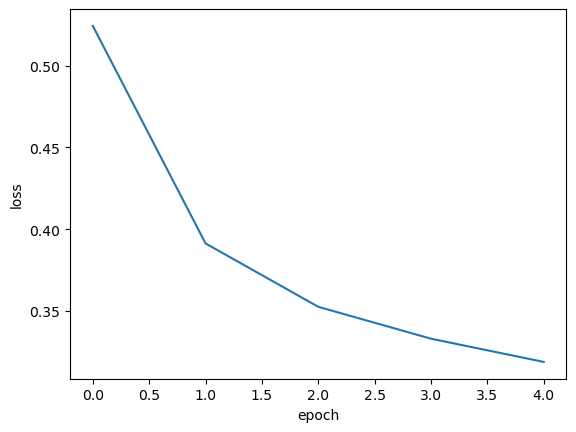

In [24]:
# 손실 곡선
plt.figure()
plt.plot(history.history["loss"])

plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

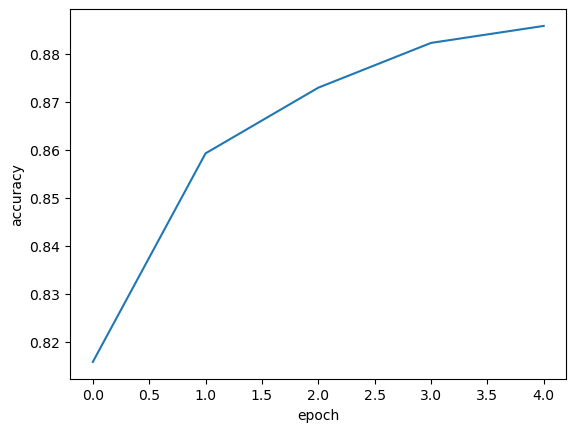

In [26]:
# 정확도 곡선
plt.figure()
plt.plot(history.history["accuracy"])

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [28]:
# epoch 를 20으로 늘려서 그래프 확인
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(scaled_train, y_train, epochs = 20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7684 - loss: 0.6662
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8551 - loss: 0.4020  
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8716 - loss: 0.3541
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8815 - loss: 0.3317
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8861 - loss: 0.3186
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8913 - loss: 0.3018
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8945 - loss: 0.2964
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8986 - loss: 0.2822
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9028 - loss: 0.2742
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9046 - loss: 0.2673
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9064 - loss: 0.2647
Epoch 12/20
1500/1500 ━━━━━━

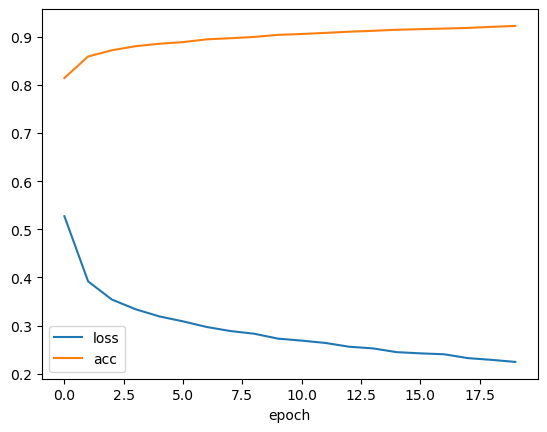

In [30]:
plt.figure()
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["accuracy"], label = "acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# 검증 손실

- 에포크에 따른 과대적합과 과소적합을 파악하려면 검증 세트에 대한 점수도 파악해야함
- 케라스에서는 fit() 메서드에 검증 데이터를 전달할 수 있음

In [33]:
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [35]:
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7640 - loss: 0.6800 - val_accuracy: 0.8550 - val_loss: 0.4058
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8573 - loss: 0.4025 - val_accuracy: 0.8605 - val_loss: 0.3824
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8695 - loss: 0.3625 - val_accuracy: 0.8683 - val_loss: 0.3663
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8791 - loss: 0.3356 - val_accuracy: 0.8755 - val_loss: 0.3471
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8890 - loss: 0.3111 - val_accuracy: 0.8840 - val_loss: 0.3353
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8939 - loss: 0.2971 - val_accuracy: 0.8737 - val_loss: 0.3618
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8920 - loss: 0.2994 - val_accuracy: 0.8796 - val_loss: 0.3511
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8983 - loss: 0.2805 - 

In [37]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


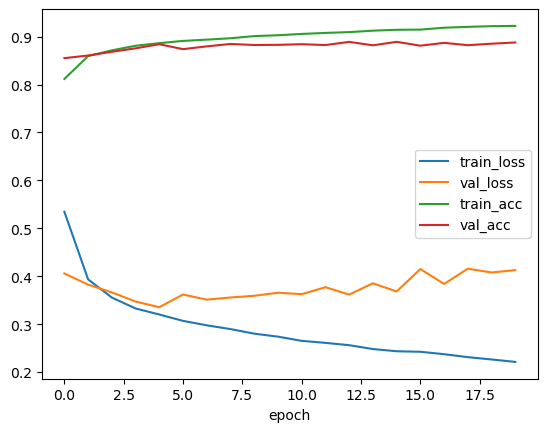

In [39]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

- 훈련 손실은 계속 감소하는데 검증 손실은 감소하다가 상승하여 과대적합 모델이 만들어짐
    - 검증 손실이 상승하는 시점을 가능한한 뒤로 늦출 필요가 있음

In [42]:
# Adam 옵티마이저 선택
model = model_fn()
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [44]:
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val), batch_size = 32)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7693 - loss: 0.6700 - val_accuracy: 0.8295 - val_loss: 0.4666
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8576 - loss: 0.4028 - val_accuracy: 0.8658 - val_loss: 0.3773
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8733 - loss: 0.3496 - val_accuracy: 0.8746 - val_loss: 0.3525
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8805 - loss: 0.3206 - val_accuracy: 0.8737 - val_loss: 0.3486
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8879 - loss: 0.3057 - val_accuracy: 0.8780 - val_loss: 0.3367
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8936 - loss: 0.2913 - val_accuracy: 0.8807 - val_loss: 0.3370
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8968 - loss: 0.2774 - val_accuracy: 0.8876 - val_loss: 0.3138
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8997 - loss: 0.2673 - 

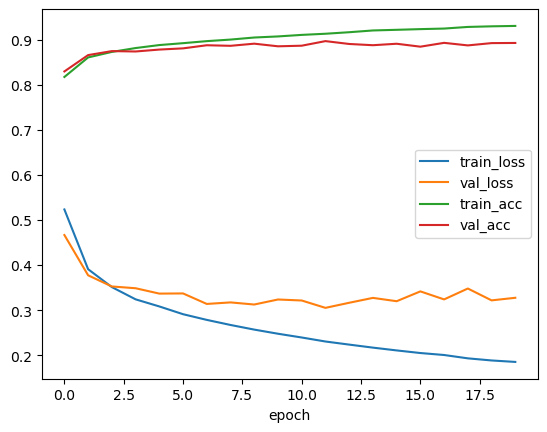

In [46]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

- RMSprop을 사용할 때보다 검증 손실 그래프의 감소 추세가 길게 이어지고 있어 Adam 옵티마이저가 이 데이터셋에 잘 맞는 것으로 보임

# 드롭아웃(dropout)

<img src="./image/dropout.png" height="500"/>

- 훈련 과정에서 층의 일부 유닛을 랜덤하게 끄는 것으로(출력을 0으로 만드는 것으로) 과대적합을 방지
    - 특정 유닛에 과대하게 의존하는 것을 줄일 수 있음
    - 일부 유닛의 출력이 없을 수 있다는 것을 감안하여 학습하게 됨
        - 모든 입력값에 대해 충분한 주의를 기울이는 방향으로 학습
- 드롭아웃은 케라스에서 Dropout 클래스로 제공
- 특정 층 뒤에 드롭아웃을 두어 해당 층의 출력을 랜덤하게 0으로 만듦
- Flatten 과 마찬가지로 층처럼 사용되지만 훈련되는 모델 파라미터가 없음

In [51]:
model = model_fn(keras.layers.Dropout(0.3))    # 30%를 드롭아웃
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- 드롭아웃 층은 입력과 출력의 크기가 같음
    - 일부 유닛의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지 않음
- 모델 훈련이 끝난 후에 평가나 예측을 수행할 때는 드롭아웃을 적용하지 않아야 함
    - 훈련된 모든 유닛을 사용해야 올바른 예측을 수행할 수 있기 때문에
    - 케라스에서는 모델을 평가와 예측에 사용할 때에는 자동으로 드롭아웃을 적용하지 않음

In [54]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [56]:
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val), batch_size = 32)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7373 - loss: 0.7515 - val_accuracy: 0.8431 - val_loss: 0.4307
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8398 - loss: 0.4455 - val_accuracy: 0.8569 - val_loss: 0.3832
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8499 - loss: 0.4060 - val_accuracy: 0.8694 - val_loss: 0.3701
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8579 - loss: 0.3904 - val_accuracy: 0.8674 - val_loss: 0.3532
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8676 - loss: 0.3635 - val_accuracy: 0.8747 - val_loss: 0.3478
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8708 - loss: 0.3524 - val_accuracy: 0.8723 - val_loss: 0.3482
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8695 - loss: 0.3465 - val_accuracy: 0.8753 - val_loss: 0.3364
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8763 - loss: 0.3342 - 

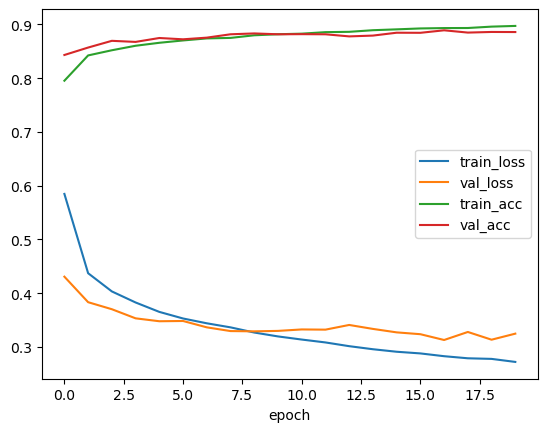

In [58]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

- 앞선 방법들에 비해 loss와 acc가 비교적 일정하게 유지됨

# 모델 저장과 복원

- 나중에 다시 사용하기 위해서 모델을 저장
- 케라스 모델은 모델의 파라미터를 저장하는 save_weights() 메서드를 제공
- 모델 구조와 모델 파라미터를 저장하는 save() 메서드도 제공

In [62]:
# 모델의 파라미터를 저장
model.save_weights("./model/model.weights.h5")

In [64]:
# 모델 구조와 모델 파라미터를 저장
model.save("./model/model-whole.keras")

## 모델 파라미터만 읽어오기

In [67]:
weights_model = model_fn(keras.layers.Dropout(0.3))    # 저장했던 모델과 정확히 같은 구조의 모델 생성

In [69]:
weights_model.load_weights("./model/model.weights.h5")

- load_weights() 메서드를 사용하려면 save_weights() 로 저장했던 모델과 정확히 같은 구조를 가져야함
- 모델 파라미터를 읽어온 모델은 evaluate() 을 사용하기 전에 compile() 을 반드시 실행해야 함

In [72]:
val_labels = np.argmax(weights_model.predict(scaled_val), axis = -1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


In [74]:
print(val_labels)

[0 3 7 ... 4 2 2]


In [76]:
print(y_val)

[0 3 7 ... 4 6 2]


In [78]:
print(np.mean(val_labels == y_val))

0.88575


- 케라스의 predict() 메서드는 모델의 예측을 수행
    - 종속변수가 10개의 클래스로 이루어졌기 때문에 각 클래스에 대한 확률을 반환
- predict() 결과에서 가장 큰 값을 고르기 위해 argmax() 함수를 사용
    - 배열에서 가장 큰 값의 인덱스를 반환
    - 몇 번째 클래스에 대한 확률값이 가장 큰 지 반환
        - 몇 번째 클래스로 예측했는지 알 수 있음 
- argmax() 함수의 axis = -1 은 배열의 마지막 차원을 따라서 최댓값을 고름
    - axis = 1 이면 열을 따라 각 행의 최댓값의 인덱스를 선택
    - axis = 0 이면 행을 따라 각 열의 최댓값의 인덱스를 선택
- argmax() 로 고른 인덱스와 타깃 인덱스를 비교하여 같으면 1, 다르면 0
    - 위 값의 평균을 구하면 정확도가 됨

## 모델 전체 읽어오기

In [82]:
whole_model = keras.models.load_model("./model/model-whole.keras")

In [84]:
whole_model.evaluate(scaled_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.8857 - loss: 0.3331


[0.3246879577636719, 0.8857499957084656]

# 콜백(callback)

- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
- fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용

## ModelCheckpoint 콜백

- 최상의 검증 점수를 만드는 모델을 저장

In [89]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-model.keras", save_best_only = True)

In [91]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [93]:
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val), callbacks = [checkpoint_cb], batch_size = 32)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7292 - loss: 0.7751 - val_accuracy: 0.8443 - val_loss: 0.4163
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8429 - loss: 0.4417 - val_accuracy: 0.8643 - val_loss: 0.3711
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8544 - loss: 0.3994 - val_accuracy: 0.8665 - val_loss: 0.3609
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8622 - loss: 0.3818 - val_accuracy: 0.8683 - val_loss: 0.3554
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8669 - loss: 0.3613 - val_accuracy: 0.8786 - val_loss: 0.3356
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8735 - loss: 0.3500 - val_accuracy: 0.8723 - val_loss: 0.3476
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8729 - loss: 0.3462 - val_accuracy: 0.8741 - val_loss: 0.3406
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8763 - loss: 0.3351 - 

- 모델이 훈련한 후에 best-model.keras 에 최상의 val_loss 를 낸 모델이 저장됨

In [96]:
best_model = keras.models.load_model("./model/best-model.keras")

In [98]:
best_model.evaluate(scaled_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.8872 - loss: 0.3165


[0.3103572130203247, 0.8895833492279053]

- ModelCheckpoin 콜백이 가장 낮은 검증 손실값의 모델을 자동으로 저장해주어 편하지만 여전히 많은 훈련을 해야해서 불편함이 있음

## EarlyStopping 콜백

- 과대적합이 시작되기 전에(검증 손실이 상승할 때) 훈련을 미리 중지하는 것을 조기종료(early stopping)라고 부름
- 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아 주기 때문에 규제 방법 중 하나로 여겨지기도 함

In [102]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

- patience
    - 검증 점수가 향상되지 않더라도 지켜볼 에포크 횟수
    - patience 가 2라면 2번 연속 검증 점수가 향상되지 않으면 훈련 중지
- restore_best_weights
    - 가장 낮은 검증 손실을 낸 모델의 상태로 되돌림

In [105]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [107]:
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val), callbacks = [early_stopping_cb], batch_size = 32)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7341 - loss: 0.7545 - val_accuracy: 0.8425 - val_loss: 0.4276
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8393 - loss: 0.4453 - val_accuracy: 0.8478 - val_loss: 0.4090
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8531 - loss: 0.4050 - val_accuracy: 0.8652 - val_loss: 0.3645
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8583 - loss: 0.3866 - val_accuracy: 0.8731 - val_loss: 0.3469
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8628 - loss: 0.3760 - val_accuracy: 0.8687 - val_loss: 0.3623
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8684 - loss: 0.3567 - val_accuracy: 0.8773 - val_loss: 0.3312
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8753 - loss: 0.3391 - val_accuracy: 0.8735 - val_loss: 0.3429
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8730 - loss: 0.3367 - 

In [113]:
# 몇 번째 에포크에서 중지되었는지 확인
print(early_stopping_cb.stopped_epoch)

10


- 11번째 에포크까지 훈련한 후 중지됨
    - patience 가 2이기 때문에 10번째 에포크 때의 모델이 최상의 모델임

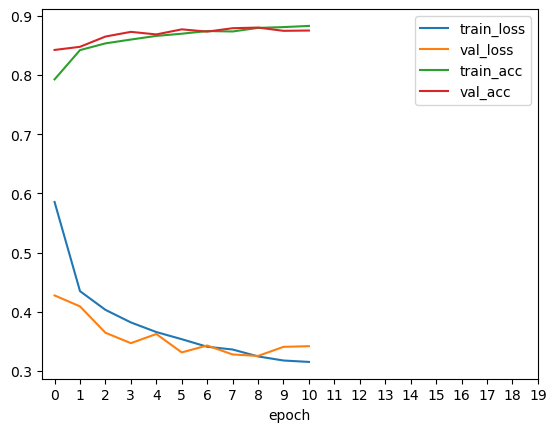

In [116]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xticks(ticks = range(20))
plt.xlabel("epoch")
plt.legend()
plt.show()

In [118]:
model.evaluate(scaled_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.8764 - loss: 0.3352


[0.32525888085365295, 0.8803333044052124]

# validation_split

- 훈련 데이터를 자체적으로 훈련/검증 셋으로 나누어서 훈련/검증을 수행

In [121]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
scaled_train = x_train / 255
scaled_test =x_test / 255

In [123]:
es_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

In [125]:
scaled_train.shape

(60000, 28, 28)

In [127]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [129]:
history = model.fit(scaled_train, y_train, epochs = 20, validation_split = 0.2, callbacks = [es_cb], batch_size = 32)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7295 - loss: 0.7834 - val_accuracy: 0.8406 - val_loss: 0.4481
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8367 - loss: 0.4533 - val_accuracy: 0.8552 - val_loss: 0.3972
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8529 - loss: 0.4107 - val_accuracy: 0.8663 - val_loss: 0.3692
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8595 - loss: 0.3854 - val_accuracy: 0.8679 - val_loss: 0.3578
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8660 - loss: 0.3674 - val_accuracy: 0.8735 - val_loss: 0.3521
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8685 - loss: 0.3543 - val_accuracy: 0.8723 - val_loss: 0.3516
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8718 - loss: 0.3469 - val_accuracy: 0.8748 - val_loss: 0.3467
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8745 - loss: 0.3321 - 

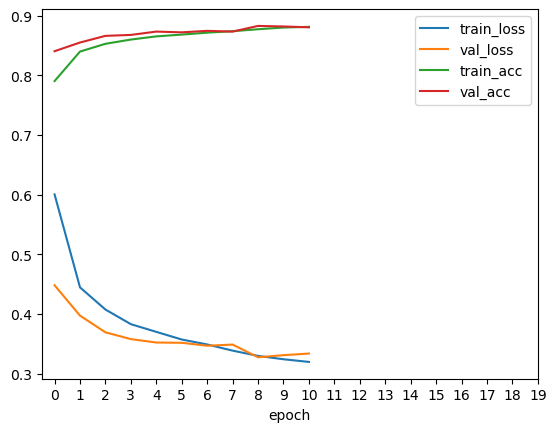

In [131]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xticks(ticks = range(20))
plt.xlabel("epoch")
plt.legend()
plt.show()

In [133]:
model.evaluate(scaled_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.8763 - loss: 0.3491


[0.35767441987991333, 0.8745999932289124]